In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns
import statistics as st

In [4]:
df = pd.read_csv('iris.csv')

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Creating a function to calculate the Pearson correlation coefficients and Plot the graph to Visualize the correlation between the two variables. 

In [6]:
def cov(x,y):
    if len(x) == len(y):
        d = len(x)-1
        return sum((x-np.mean(x))*(y-np.mean(y)))/d
    else :
        print('Dont have same size')

In [7]:
def correlation(x,y):
    return cov(x,y)/(st.stdev(x)*st.stdev(y))

In [8]:
correlation(df['sepal_length'],df['sepal_width'])

-0.11756978413300201

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

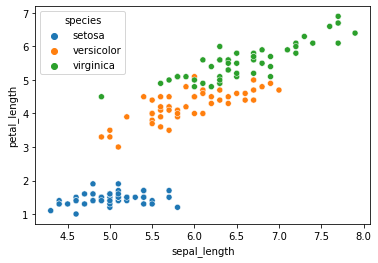

In [9]:
sns.scatterplot(data = df,x='sepal_length',y='petal_length',hue = 'species',)

In [10]:
cor = df.corr()
cor

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

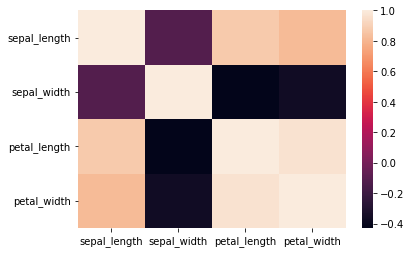

In [11]:
sns.heatmap(cor)

## Perform Z score standardization on the data and compute the covariance matrix for the standardized data 

In [12]:
def z_score(df):
    columns = df.select_dtypes(include=np.number).columns.to_list()
    for col in columns:    
        df[col] = (df[col]-np.mean(df[col]))/np.std(df[col])
    
    df.to_csv('ML_Zscoreiris.csv')
    return df

In [13]:
ds = z_score(df)
ds

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,virginica
146,0.553333,-1.282963,0.705921,0.922303,virginica
147,0.795669,-0.131979,0.819596,1.053935,virginica
148,0.432165,0.788808,0.933271,1.448832,virginica


In [14]:
corofds = z_score(ds).corr()
corofds

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

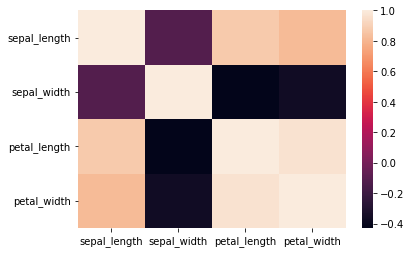

In [15]:
sns.heatmap(corofds)

## Compute the Eigen Values and Eigen Vectors of the covariance matrix 

In [16]:
m = corofds.to_numpy()
display(m)

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [17]:
from numpy import linalg as eig
eigen_values,eigen_vectors = np.linalg.eig(m)
print(eigen_values,eigen_vectors)

[2.91849782 0.91403047 0.14675688 0.02071484] [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [26]:
eigen_values

array([2.91849782, 0.91403047, 0.14675688, 0.02071484])

In [27]:
eigen_vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])